In [39]:
import pandas as pd

In [32]:
from sklearn.datasets import load_wine

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df=pd.read_csv('Used Car Dataset.csv')
df1=pd.read_csv('aaa.csv')


In [43]:
df.head()



,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [102]:
df.rename(columns={'price(in lakhs)':'price'},inplace=True)




In [103]:
df.rename(columns={'engine(cc)':'engine'},inplace=True)


In [104]:
X=df1
y=df.price


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [124]:
X_train

,Unnamed: 0,seats,engine
660,660,5,1197.0
1331,1331,5,370.0
312,312,5,1496.0
986,986,5,1984.0
544,544,5,1197.0
...,...,...,...
1130,1130,5,1493.0
1294,1294,5,1498.0
860,860,5,1248.0
1459,1459,5,1396.0


In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
X_train=scaler.fit_transform(X_train)

In [127]:
X_test=scaler.transform(X_test)

In [128]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [117]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [134]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [132]:
mse

array([-2.78743021e+02, -3.85890040e+01, -1.19578160e+06, -6.97404408e+02,
       -2.87823996e+01, -3.90348663e+01, -9.01112341e+01, -1.87227602e+02,
       -1.62469380e+02, -4.07436110e+01])

In [133]:
reg_pred=regression.predict(X_test)

In [135]:
reg_pred

array([  8.7156263 ,  13.47573438,  13.16284221,  13.15636611,
        10.51017184,  13.58845741,  13.16664421,  11.29338451,
        12.9206419 ,   9.71175115,  10.26684361,  13.16777212,
        14.25781914,   9.76117716,  14.38821516,   9.16806469,
        11.2819785 ,   8.78786436,  13.83692462,  13.86353871,
        10.76110405,  10.89037216,  12.47960952,  10.04632744,
        12.51762954,  11.25156247,  12.83699783,  13.59359648,
        11.59754477,  14.27662001,  12.96246394,  11.80285294,
        12.6849177 ,  13.88902476,  11.12989837,  11.22494845,
         9.33535283,   8.87150844,  12.71153172,  13.80270666,
        11.84087298,   9.60909704,  12.62408565,   9.77638521,
        13.05751402,   9.29353079,  11.87128901,  12.18305327,
        10.33527969,  13.21339615,  14.03082685,  10.80292609,
        13.45939846,  10.75730205,  10.39611174,   9.71935516,
        10.5862119 ,  10.1109615 ,  11.94732907,  14.41482919,
        10.14898153,  13.73046859,  13.09173205,  14.31

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


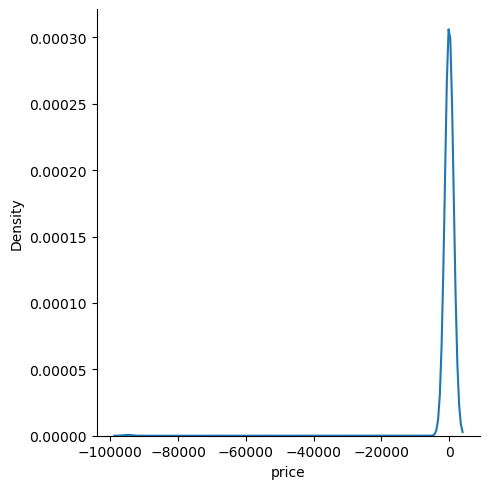

In [136]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [137]:
from sklearn.metrics import r2_score

In [138]:
score=r2_score(reg_pred,y_test)

In [139]:
score

-929481.8203385123

In [140]:
LinearRegression()

LinearRegression()